### 图像的读取与显示
- 读取图像（彩色、灰度图像读取）
- 显示图像（窗口创建，waitkey和destroyAllWindows的用法）
- 图像尺寸获取（宽、高、通道数、数据类型）
- 图像生成（生成指定尺寸的图像）
- 图像的色彩空间转换（RGB转HSL、YCbCr、Gray）

- 访问和操作图像像素
- 图像三通道分离和合并

In [1]:
import cv2
import numpy as np

- 读取图像
- 显示图像

In [25]:
img = cv2.imread('lena.jpg')
cv2.imshow("lena", img)
img_gray = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('lena_gray', img_gray)
while True:
    key_press = cv2.waitKey(0)
    if key_press & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

- 图像的尺寸获取
- 图像生成

In [33]:
h, w, channle = img.shape
[h, w, channle]
img_zero = np.zeros(img.shape, np.uint8)
img_fix = np.ones((300, 500, 3), np.uint8)
# img_fix = img_fix * 150
cv2.imshow("img_zero", img_zero)
cv2.imshow("img_fix", img_fix)
while True:
    key_press = cv2.waitKey(0)
    if key_press & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

In [28]:
# 图像的数据类型
img.dtype

dtype('uint8')

- 图像的色彩空间转换（RGB转HSL、YCbCr、Gray）

In [34]:
img_hsl = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
img_ycbcr = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
img_cvt_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("img_hsl", img_hsl)
cv2.imshow("img_ycbcr", img_ycbcr)
cv2.imshow("img_cvt_gray", img_cvt_gray)
while True:
    key_press = cv2.waitKey(0)
    if key_press & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

- 访问和操作图像像素

In [44]:
img[0:100,0:50,1] = np.ones((100, 50), np.uint8)
cv2.imshow("img", img)
while True:
    key_press = cv2.waitKey(0)
    if key_press & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

- 图像通道的分离和混合
   1. <font color=#f6ff00>openCV的通道顺序是B G R，和Matlab及Matplotlib里图像的色彩空间顺序不一致，混合编程的时候一定要注意</font>
    

In [45]:
b,g,r = cv2.split(img);
cv2.imshow("b", b)
cv2.imshow("g", g)
cv2.imshow("r", r)
while True:
    key_press = cv2.waitKey(0)
    if key_press & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

In [46]:
img_merge = cv2.merge([b,g,r])
cv2.imshow("img_merge", img_merge)
while True:
    key_press = cv2.waitKey(0)
    if key_press & 0xFF == ord('q'):
        cv2.destroyAllWindows()
        break

<function matplotlib.pyplot.show(*args, **kw)>

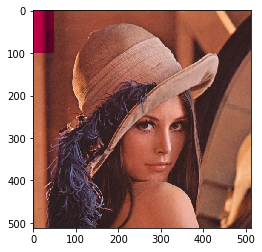

In [51]:
# 用plt画图 展示通道顺序不同的效果
from matplotlib import pyplot as plt
plt.imshow(img_merge)
plt.show
img_merge_rgb = cv2.merge([r,g,b])
plt.imshow(img_merge_rgb)
plt.show

### 图像插值运算
- 最近邻插值
- 双线性插值

In [19]:
import cv2
import numpy as np

In [14]:
img = cv2.imread("lena.jpg")
h, w = img.shape[:2]

512 512
(512,)


In [35]:
img_resize_nearst = cv2.resize(img, (0,0), fx = 2, fy = 2,  interpolation = cv2.INTER_NEAREST)
img_resize_linear = cv2.resize(img, (0,0), fx = 2, fy = 2, interpolation = cv2.INTER_LINEAR)
img_resize_cubic = cv2.resize(img, (h * 2, w * 2), interpolation = cv2.INTER_CUBIC)
img_resize_area = cv2.resize(img, (round(h * 0.5), round(h * 0.5)), interpolation = cv2.INTER_AREA)

cv2.imshow("img_resize", img_resize)
cv2.imshow("img_resize_linear", img_resize_linear)
cv2.imshow("img_resize_cubic", img_resize_cubic)
cv2.imshow("img_resize_area", img_resize_area)

keypress = cv2.waitKey(0) 
if keypress & 0xFF == ord('q'):
    cv2.destroyAllWindows()

### 图像的点运算
- 逻辑运算（与、或）
+ 加
   1. a = np.array([[56,2,3],[254,255,6]]).astype('uint8')
   2. b = np.array([[255,255,3],[4,5,6]]).astype('uint8')
   3. a + b
- 减
- 乘
- 除

In [72]:
one_mask = np.zeros((img.shape), np.uint8)
one_mask[200:400,200:370,:]=np.ones((200,170,3), np.uint8)
one_mask = one_mask * 255
img_and = cv2.bitwise_and(img, one_mask)
cv2.imshow('img_and', img_and)
keypress = cv2.waitKey(0)
cv2.destroyAllWindows()       

In [2]:
img1 = cv2.imread("lena.jpg")
h, w = img1.shape[:2]
img2 = cv2.imread('logo.png')
img2_resize = cv2.resize(img1, (h, w), interpolation = cv2.INTER_CUBIC)
add_img = img1 - img2_resize
add_img2 = cv2.add(img1, img2_resize)
cv2.imshow('add', add_img)
cv2.imshow('add_img2', add_img2)
keypress = cv2.waitKey(0)
if keypress & 0xFF == ord('q'):
    cv2.destroyAllWindows()                  

In [61]:
one_mask = np.zeros((img.shape), np.uint8)
one_mask[0:100,0:100,:]=np.ones((100,100,3), np.uint8)
one_mask = one_mask * 255
img_multi = img * one_mask
img_multi2 = cv2.multiply(img, one_mask)
cv2.imshow('one_mask', one_mask)
cv2.imshow('img_multi', img_multi)
cv2.imshow('img_multi2', img_multi2)
keypress = cv2.waitKey(0)
cv2.destroyAllWindows()       

### 灰度直方图
- 直方图统计公式
$$H_k=\frac{N_k}{N}\quad k=0,1,2,\cdots,255$$

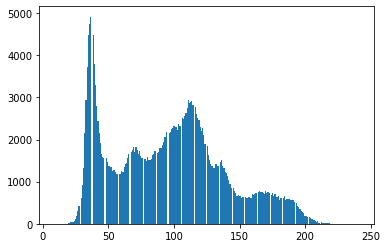

In [3]:
from matplotlib import pyplot as plt
img_gray = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)
plt.hist(img_gray.ravel(), 256)
plt.show()

<class 'numpy.ndarray'>
256
(256, 1)


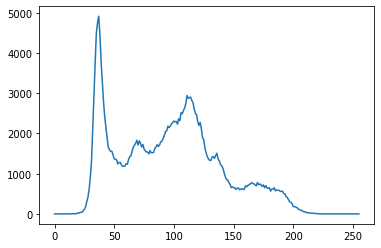

In [10]:
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 255])
print(type(hist))
print(hist.size)
print(hist.shape)

plt.plot(hist)
plt.show()

<class 'numpy.ndarray'>
256
(256,)


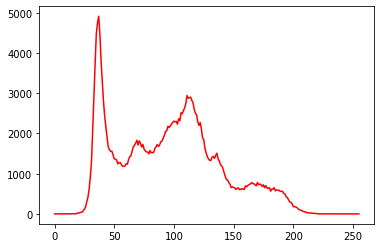

In [9]:
h,w = img_gray.shape
hist_own = np.zeros(256)
for i in range(h):
    for j in range(w):
        hist_own[img_gray[i,j]] += 1
print(type(hist_own))
print(hist_own.size)
print(hist_own.shape)

plt.plot(hist_own, color="r")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

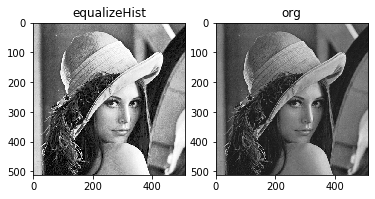

In [16]:
img_gray_equalizeHist = cv2.equalizeHist(img_gray)
plt.subplot(1,2,1)
plt.imshow(img_gray_equalizeHist, cmap ='gray')
plt.title('equalizeHist')
plt.subplot(1,2,2)
plt.imshow(img_gray, cmap ='gray')
plt.title('org')
plt.show